In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, pickle
import sys
from skimage import io
import tensorflow as tf
import os
import warnings
warnings.filterwarnings('ignore')

sys.path.append("../../bioseg")

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = str(0)
sess = tf.InteractiveSession()

# Load Dataset

In [3]:
dataset_folder = '/data/natalia/intern20/PaperData/MIBI_2channel/'

n_scribbles = 100
dataset_path = dataset_folder + 'dataset_mibi2ch_noaug_n'+str(n_scribbles)+'.npz'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Training shape (X,Y)
(60, 128, 128, 2) (60, 128, 128, 6)
Validation (X,Y)
(16, 128, 128, 2) (16, 128, 128, 6)

----- Plot Patches Train Dataset -----


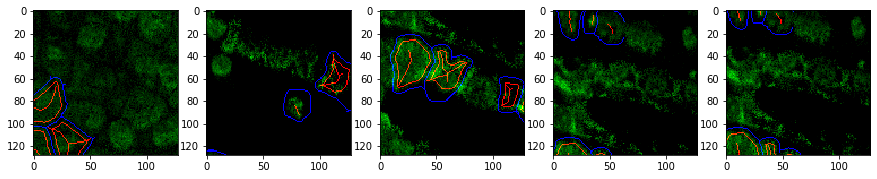

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



----- Plot Patches Validation Dataset -----


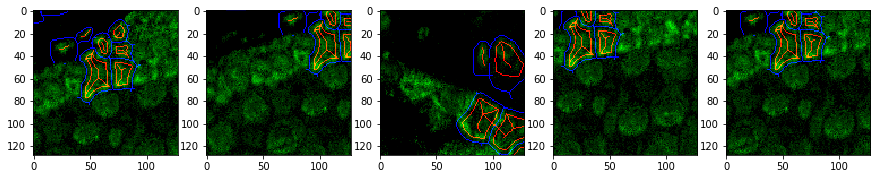

In [4]:
## Plot some patches ##
ix_channel = 2 ## Channel selection (0 cytoplasm, 1 nuclei, 2 cytoplasm + nuclei out of cytoplasm)
npz_file = np.load(dataset_path)

X_train = npz_file['X_train']
Y_train = npz_file['Y_train']
X_val = npz_file['X_val']
Y_val = npz_file['Y_val']

print('Training shape (X,Y)')
print(X_train.shape, Y_train.shape)
print('Validation (X,Y)')
print(X_val.shape, Y_val.shape)


print()
print('----- Plot Patches Train Dataset -----')
index = np.arange(Y_train.shape[0])
np.random.shuffle(index)
cont = 1
plt.figure(figsize = (15,4))
for ix in index[0:5]:
    img_plot = np.concatenate([Y_train[ix,:,:,ix_channel*2][...,np.newaxis],
                               0.7*X_train[ix,:,:,0][...,np.newaxis] + 0.5*X_train[ix,:,:,1][...,np.newaxis],
                               Y_train[ix,:,:,ix_channel*2+1][...,np.newaxis]],axis = -1)
    
    plt.subplot(1,5,cont)
    cont += 1
    plt.imshow(img_plot)
plt.show()

print()
print('----- Plot Patches Validation Dataset -----')
index = np.arange(Y_val.shape[0])
np.random.shuffle(index)
cont = 1
plt.figure(figsize = (15,4))
for ix in index[0:5]:
    img_plot = np.concatenate([Y_val[ix,:,:,ix_channel*2][...,np.newaxis],
                               0.7*X_val[ix,:,:,0][...,np.newaxis] + 0.5*X_val[ix,:,:,1][...,np.newaxis],
                               Y_val[ix,:,:,ix_channel*2+1][...,np.newaxis]],axis = -1)
    
    plt.subplot(1,5,cont)
    cont += 1
    plt.imshow(img_plot)
plt.show()


## Set Model

In [5]:
basedir = '/data/natalia/intern20/model/MIBI_2channel/'
model_name = 'BioSeg_n'+str(n_scribbles)

## Config file generation
from BioSeg_config import *
BioConfig = BioSegConfig(X_train,train_epochs=10,weights_objectives=[0.1, 0.4, 0.2, 0.2],n_instance_seg=1,
                         unet_n_first=128,train_batch_size=32)
print(BioConfig)

BioSegConfig(axes='YXC', batch_norm=False, channel_denoised=False, distributions='gauss', fit_mean=True, fit_std=False, means=['0.09461186', '0.09683015'], multi_objective=True, n2v_leave_center=False, n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=5, n2v_patch_shape=(128, 128), n2v_perc_pix=1.5, n_back_i_modes=1, n_back_modes=2, n_channel_in=2, n_channel_out=18, n_components=2, n_dim=2, n_fore_i_modes=1, n_fore_modes=2, n_instance_seg=1, normalizer='none', probabilistic=False, scale_aug=False, single_net_per_channel=False, stds=['0.16669376', '0.19344658'], structN2Vmask=None, train_batch_size=32, train_checkpoint='weights_best.h5', train_checkpoint_epoch='weights_now.h5', train_checkpoint_last='weights_last.h5', train_epochs=10, train_learning_rate=0.0004, train_loss='demix', train_reduce_lr={'monitor': 'val_loss', 'factor': 0.5, 'patience': 10}, train_steps_per_epoch=50, train_tensorboard=False, unet_input_shape=(None, None, 2), unet_kern_size=3, unet_last_activation='lin

Using TensorFlow backend.


In [6]:
from BioSeg_models import set_bioseg_model,model_trainer_fc

## create model
model = set_bioseg_model(basedir, model_name, BioConfig)
trainer_fc = model_trainer_fc(model) #trainer function

------------------  BioSeg setup  -------------------------
basedir/model name :  /data/natalia/intern20/model/MIBI_2channel/BioSeg_n100
model file :  /data/natalia/intern20/model/MIBI_2channel/BioSeg_n100/weights_best.h5

** Create Model **

BioSegConfig(axes='YXC', batch_norm=False, channel_denoised=False, distributions='gauss', fit_mean=True, fit_std=False, means=['0.09461186', '0.09683015'], multi_objective=True, n2v_leave_center=False, n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=5, n2v_patch_shape=(128, 128), n2v_perc_pix=1.5, n_back_i_modes=1, n_back_modes=2, n_channel_in=2, n_channel_out=18, n_components=2, n_dim=2, n_fore_i_modes=1, n_fore_modes=2, n_instance_seg=1, normalizer='none', probabilistic=False, scale_aug=False, single_net_per_channel=False, stds=['0.16669376', '0.19344658'], structN2Vmask=None, train_batch_size=32, train_checkpoint='weights_best.h5', train_checkpoint_epoch='weights_now.h5', train_checkpoint_last='weights_last.h5', train_epochs=10, train

### Trainer

In [7]:
from seg_trainer import train_model
from time import time

starttime = time()
save_data = train_model(trainer_fc,dataset_path=dataset_path, augment=True)
endtime = time()

Training model ---- 
dataset :  /data/natalia/intern20/PaperData/MIBI_2channel/dataset_mibi2ch_noaug_n100.npz


Preparing validation data:  25%|██▌       | 4/16 [00:00<00:00, 36.13it/s]

### SUMMARY DATA ###
training
(480, 128, 128, 2) (480, 128, 128, 6)
fraction train patches with annotations :  1.0
Validation
(16, 128, 128, 2) (16, 128, 128, 6)
fraction val patches with annotations :  1.0
True
245 blind-spots will be generated per training patch of size (128, 128).


Preparing validation data: 100%|██████████| 16/16 [00:00<00:00, 35.88it/s]


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10




50/50 [==============================] - 55s 1s/step - loss: 0.2419 - rec: 0.9379 - entropy: 0.4960 - multich_seg_error: 0.1916 - seg_error: 0.1787 - val_loss: 0.2085 - val_rec: 0.9367 - val_entropy: 0.3660 - val_multich_seg_error: 0.1516 - val_seg_error: 0.1354
Epoch 2/10
50/50 [==============================] - 52s 1s/step - loss: 0.1919 - rec: 0.9328 - entropy: 0.2953 - multich_seg_error: 0.1280 - seg_error: 0.1185 - val_loss: 0.1870 - val_rec: 0.9360 - val_entropy: 0.1914 - val_multich_seg_error: 0.1250 - val_seg_error: 0.1086
Epoch 3/10
50/50 [==============================] - 53s 1s/step - loss: 0.1571 - rec: 0.9318 - entropy: 0.2076 - multich_seg_error: 0.0831 - seg_error: 0.0767 - val_loss: 0.1731 - val_rec: 0.9382 - val_entropy: 0.2062 - val_multich_seg_error: 0.1020 - val_seg_error: 0.0961
Epoch 4/10
50/50 [==============================] - 53s 1s/step - loss: 0.131

In [8]:
print(endtime - starttime)

541.2230751514435


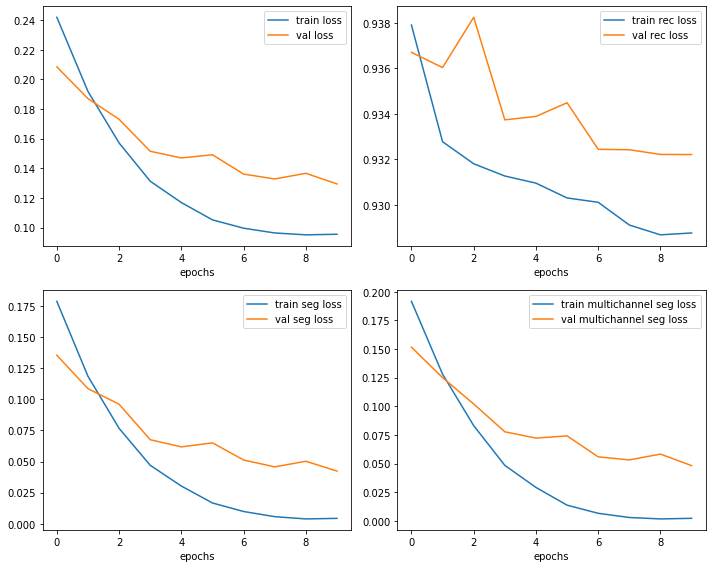

In [40]:
history = save_data['history']

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(history['loss'],label='train loss')
plt.plot(history['val_loss'],label='val loss')
plt.xlabel('epochs')
plt.legend()
plt.subplot(2,2,2)
plt.plot(history['rec'],label='train rec loss')
plt.plot(history['val_rec'],label='val rec loss')
plt.xlabel('epochs')
plt.legend()
plt.subplot(2,2,3)
plt.plot(history['seg_error'],label='train seg loss')
plt.plot(history['val_seg_error'],label='val seg loss')
plt.xlabel('epochs')
plt.legend()

plt.subplot(2,2,4)
plt.plot(history['multich_seg_error'],label='train multichannel seg loss')
plt.plot(history['val_multich_seg_error'],label='val multichannel seg loss')
plt.xlabel('epochs')
plt.legend()
plt.tight_layout()
plt.show()

## Evaluation

In [12]:
pd_train = pd.read_csv(dataset_folder + 'files.csv',index_col=0)
pd_train

,prefix,input_dir,input_file,group
0,image0,/data/natalia/intern20/PaperData/MIBI_2channel/,image0.npz,train
1,image1,/data/natalia/intern20/PaperData/MIBI_2channel/,image1.npz,train
2,image2,/data/natalia/intern20/PaperData/MIBI_2channel/,image2.npz,test
3,image3,/data/natalia/intern20/PaperData/MIBI_2channel/,image3.npz,test


In [13]:
eval_tag = 'instance_0' #pick between channel_0 (cyto), channel_1 (nuclei), instance_0 (cyto + nuclei out of cyto)

In [15]:
from BioSeg_models import model_evaluation_fc
from BioSeg_postprocess import single_channel_evaluation,get_performance,get_best_th,get_best,get_stats_th
model_evaluation = model_evaluation_fc(model, perc_normalization=False)

if eval_tag == 'channel_0':
    ix_fg = list(np.arange(model.config.n_fore_modes))
    ix_label = 0
    
if eval_tag == 'channel_1':
    ix_fg = list(np.arange(model.config.n_fore_modes))
    ix_label = 1
    
if eval_tag == 'instance_0':
    ix_fg = list(np.arange(model.config.n_fore_i_modes))
    ix_label = 2

# ### Test evaluation ###
Y_est_test_list, Y_gt_test_list, X_test_list, prefix_test = single_channel_evaluation(pd_train, model_evaluation,
                                                                                          tag=eval_tag,
                                                                                      ix_fg_list=ix_fg,
                                                                                      group='test',
                                                                                      ix_label = ix_label)

# ### Train evaluation ###
Y_est_train_list, Y_gt_train_list, X_train_list, prefix_train = single_channel_evaluation(pd_train, model_evaluation,
                                                                                          tag=eval_tag,
                                                                                      ix_fg_list=ix_fg,
                                                                                      group='train',
                                                                                      ix_label = ix_label)

Evaluation :  test ; from sample  0  to  2
The input image is of type float64 and will be casted to float32 for prediction.
Evaluation :  train ; from sample  0  to  2
The input image is of type float64 and will be casted to float32 for prediction.


In [16]:
### performance ###
th_list = np.linspace(0, 1, 21)[1:-1]
pd_stats_train = get_performance(Y_est_train_list, Y_gt_train_list, th_list=th_list)
pd_stats_train['group'] = 'train'
pd_stats_train['prefix'] = list(np.array(prefix_train)[pd_stats_train['index'].values.astype('int'), 0])

print()
best_value,best_th = get_best_th(pd_stats_train,metric_list=['IoU','Dice','Acc'])
print('Best Value, Threshold : ',best_value, best_th)

print()
print('Train Performance :: ')
pd_best_train = get_stats_th(pd_stats_train,best_th,metric_list=['IoU','Dice','Acc'])
print(pd_best_train)

Evaluation i/nsamples
0 2
1 2

Best Value, Threshold :  {'IoU': 0.5286449091018252, 'Dice': 0.6485332474855885, 'Acc': 0.8514468749999999} {'IoU': 0.9500000000000001, 'Dice': 0.9500000000000001, 'Acc': 0.05}

Train Performance :: 
        IoU      Dice       Acc       auc  group  prefix
0  0.490567  0.614941  0.794119  0.934822  train  image0
1  0.566723  0.682125  0.908775  0.964967  train  image1


In [17]:
pd_stats_test = get_performance(Y_est_test_list, Y_gt_test_list, th_list=[best_th[ix] for ix in best_th.keys()])
pd_stats_test['group'] = 'test'
pd_stats_test['prefix'] = list(np.array(prefix_test)[pd_stats_test['index'].values.astype('int'), 0])

print()
pd_best_test = get_stats_th(pd_stats_test,best_th,metric_list=['IoU','Dice','Acc'])
print('Test Performance :: ')
print(pd_best_test)

Evaluation i/nsamples
0 2
1 2

Test Performance :: 
        IoU      Dice       Acc       auc group  prefix
0  0.498305  0.617441  0.918775  0.971354  test  image2
1  0.569824  0.690891  0.877944  0.952394  test  image3


## Plots

In [18]:
plot_scribbles = True
if plot_scribbles:
    pd_scribbles = pd.read_csv(dataset_folder+'files_scribbles_train_'+str(int(n_scribbles))+'.csv') 
#we want to plot the scribbles

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU       0.566723
Dice      0.682125
Acc       0.908775
auc       0.964967
group        train
prefix      image1
Name: 1, dtype: object


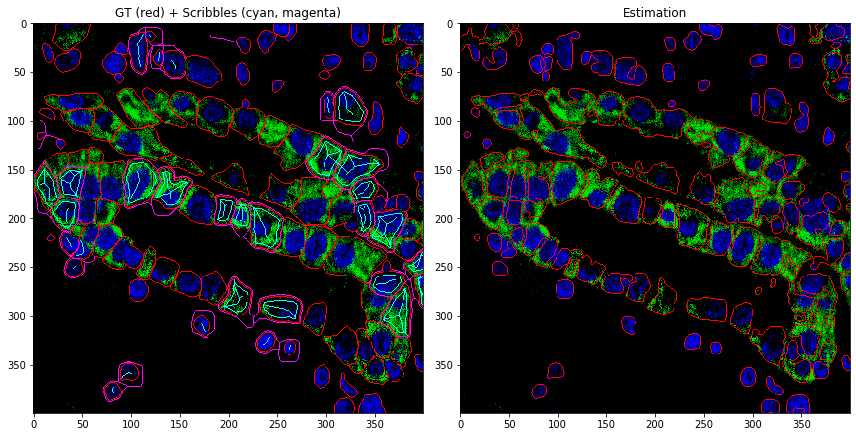

In [36]:
from BioSeg_postprocess import get_seg_image

i=1
print(pd_best_train.iloc[i])

implot_gt = get_seg_image(X_train_list[i],Y_gt_train_list[i])
implot_est = get_seg_image(X_train_list[i],Y_est_train_list[i],th = best_th['Dice'])

if plot_scribbles:
    prefix = pd_best_train.iloc[i]['prefix']
    input_dir = pd_scribbles.loc[pd_scribbles['prefix'] == prefix]['input_dir'].values[0]
    scribble_file = pd_scribbles.loc[pd_scribbles['prefix'] == prefix]['scribble_file'].values[0]

    npz_read = np.load(input_dir + scribble_file)
    scribble = npz_read['scribble']

    implot_gt = implot_gt*(1-np.sum(scribble,axis=-1)[...,np.newaxis])
    
    scribble_back = np.sum(scribble[...,ix_label*3+1:ix_label*3+3],axis = -1)
    
    #foreground
    implot_gt[scribble[...,ix_label*3]>0,0] = 0
    implot_gt[scribble[...,ix_label*3]>0,1] = 10
    implot_gt[scribble[...,ix_label*3]>0,2] = 10
    
    implot_gt[scribble_back>0,0] = 10
    implot_gt[scribble_back>0,1] = 0
    implot_gt[scribble_back>0,2] = 10
    

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('GT (red) + Scribbles (cyan, magenta)')
plt.imshow(implot_gt)
plt.subplot(1,2,2)
plt.title('Estimation')
plt.imshow(implot_est)
plt.tight_layout()
plt.show()

IoU       0.569824
Dice      0.690891
Acc       0.877944
auc       0.952394
group         test
prefix      image3
Name: 1, dtype: object


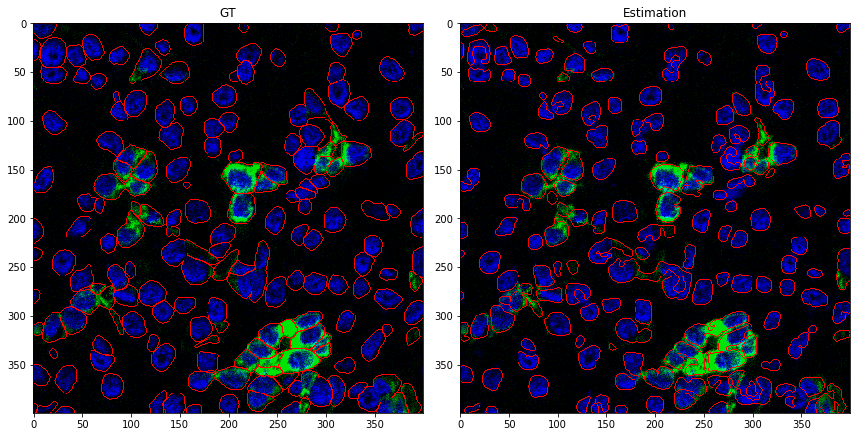

In [39]:
#Test (no scribbles patches)
from BioSeg_postprocess import get_seg_image
# for i in range(len(X_test_list)):
i = 1
print(pd_best_test.iloc[i])

implot_gt = get_seg_image(X_test_list[i],Y_gt_test_list[i])
implot_est = get_seg_image(X_test_list[i],Y_est_test_list[i],th = best_th['Dice'])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('GT')
plt.imshow(implot_gt)
plt.subplot(1,2,2)
plt.title('Estimation')
plt.imshow(implot_est)
plt.tight_layout()
plt.show()